<a href="https://colab.research.google.com/github/Erandi25/Medical_Cost-Predictor_project_-Decision_Tree_Regressor/blob/main/Medical_Cost_Predictor_project__Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# Convert smoker column to numeric
df['smoker_numeric'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Select features for first model
features = ['age', 'bmi', 'smoker_numeric']
X = df[features]
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

print(f"Baseline Linear Regression MAE: ${mae:.2f}")


Baseline Linear Regression MAE: $4260.56


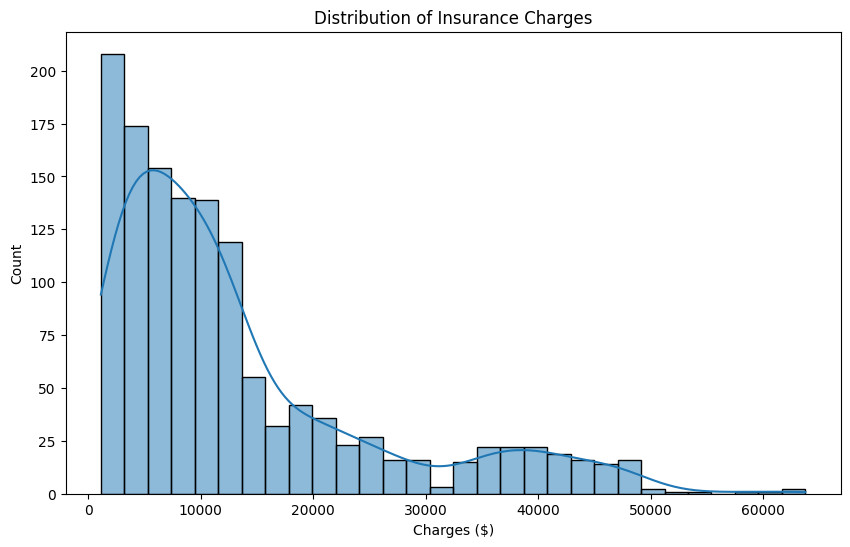

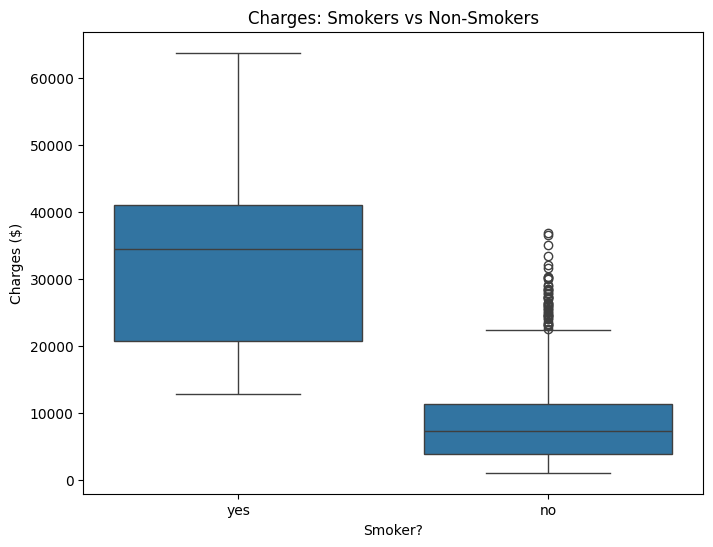

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges ($)")
plt.ylabel("Count")
plt.show()

# Boxplot: Smokers vs Non-Smokers
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Charges: Smokers vs Non-Smokers")
plt.xlabel("Smoker?")
plt.ylabel("Charges ($)")
plt.show()


In [5]:
# Create encoded dataset
df_encoded = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

df_encoded.head()


,age,bmi,children,smoker,charges,smoker_numeric,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,1,False,False,False,True
1,18,33.770,1,no,1725.55230,0,True,False,True,False
2,28,33.000,3,no,4449.46200,0,True,False,True,False
3,33,22.705,0,no,21984.47061,0,True,True,False,False
4,32,28.880,0,no,3866.85520,0,True,True,False,False


In [6]:
# New feature list including encoded columns
new_features = [
    'age', 'bmi', 'smoker_numeric',
    'sex_male',
    'region_northwest', 'region_southeast', 'region_southwest'
]

X_new = df_encoded[new_features]
y_new = df_encoded['charges']

# Train-test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42
)

# Train improved model
smarter_model = LinearRegression()
smarter_model.fit(X_train_new, y_train_new)

# Evaluate
new_predictions = smarter_model.predict(X_test_new)
new_mae = mean_absolute_error(y_test_new, new_predictions)

print(f"Smarter Linear Regression MAE: ${new_mae:.2f}")


Smarter Linear Regression MAE: $4222.91


In [7]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(max_depth=6, random_state=42)
tree_model.fit(X_train_new, y_train_new)

tree_predictions = tree_model.predict(X_test_new)
tree_mae = mean_absolute_error(y_test_new, tree_predictions)

print(f"Decision Tree MAE: ${tree_mae:.2f}")


Decision Tree MAE: $3140.07
